# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [3]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 32.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 39.1 MB/s eta 0:00:01


In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Create test set and define test dataloader

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I used the transforms.ToTensor() function to convert the data to Tensors and the transforms.Normalize() function to normalize the data.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


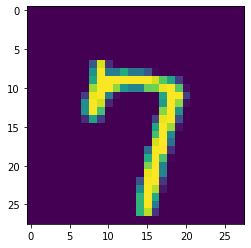

8


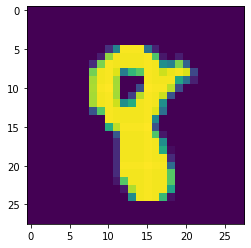

2


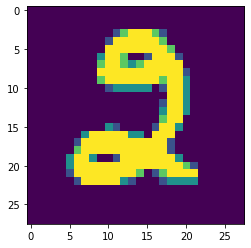

8


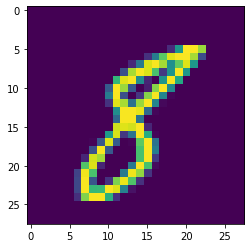

5


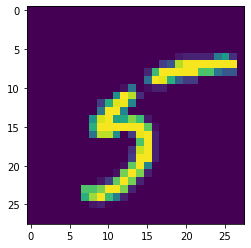

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 80)
        self.fc3 = nn.Linear(80, 10)
        self.final = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()
        
    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.final(x)
    
model = MNIST_Net()
model.cuda()

MNIST_Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
  (final): LogSoftmax(dim=1)
  (relu): ReLU()
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
epochs = 25
losses = []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.cuda(), labels.cuda()
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    losses.append(running_loss/len(trainloader))
    print('Epoch {} - Training loss: {}'.format(epoch, running_loss/len(trainloader)))

Epoch 0 - Training loss: 0.37885760879719943
Epoch 1 - Training loss: 0.25016598032711984
Epoch 2 - Training loss: 0.24021096897921138
Epoch 3 - Training loss: 0.22184528906577464
Epoch 4 - Training loss: 0.21136583542741183
Epoch 5 - Training loss: 0.21251392855978152
Epoch 6 - Training loss: 0.19809557322208196
Epoch 7 - Training loss: 0.1998729196422771
Epoch 8 - Training loss: 0.19443595091671323
Epoch 9 - Training loss: 0.18754203074863915
Epoch 10 - Training loss: 0.18534793483832085
Epoch 11 - Training loss: 0.17891111203716564
Epoch 12 - Training loss: 0.18635793866416905
Epoch 13 - Training loss: 0.1864368581130648
Epoch 14 - Training loss: 0.1755125726809475
Epoch 15 - Training loss: 0.18231709395795426
Epoch 16 - Training loss: 0.17352508518225285
Epoch 17 - Training loss: 0.17446888087025442
Epoch 18 - Training loss: 0.17545582905986598
Epoch 19 - Training loss: 0.17367817713384595
Epoch 20 - Training loss: 0.16988268760301029
Epoch 21 - Training loss: 0.16584499841029726
E

Plot the training loss (and validation loss/accuracy, if recorded).

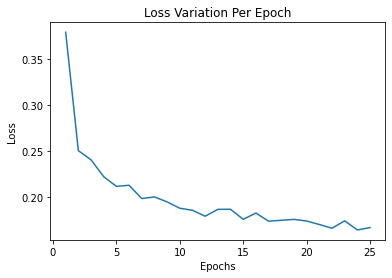

In [13]:
## YOUR CODE HERE ##
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Variation Per Epoch');

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
## YOUR CODE HERE ##
accurate = 0
total = 0

for images, labels in testloader:
    images, labels = images.cuda(), labels.cuda()
    
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logit = model(img)
            
        pred = logit.data.max(1, keepdim=True)[1]
        actual = labels[i]
        
        if int(actual) == int(pred[0][0]):
            accurate += 1
            
        total += 1

print('Accuracy is', accurate/total)                   

Accuracy is 0.9429


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
## YOUR CODE HERE ##
class MNIST_Net2(nn.Module):
    def __init__(self):
        super(MNIST_Net2, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.final = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.final(x)

model2 = MNIST_Net2()
model2.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)


epochs = 30
losses = []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.cuda(), labels.cuda()
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    losses.append(running_loss/len(trainloader))
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))

    
accurate = 0
total = 0

for images, labels in testloader:
    images, labels = images.cuda(), labels.cuda()
    
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logit = model2(img)
            
        pred = logit.data.max(1, keepdim=True)[1]
        actual = labels[i]
        
        if int(actual) == int(pred[0][0]):
            accurate += 1
            
        total += 1

accuracy = accurate / total
print(f"\nTest Accuracy: {accuracy:.2%}")

Epoch 0 - Training loss: 0.4029767903278886
Epoch 1 - Training loss: 0.1881997115226951
Epoch 2 - Training loss: 0.13609284122408963
Epoch 3 - Training loss: 0.11034021650834172
Epoch 4 - Training loss: 0.09166666790187708
Epoch 5 - Training loss: 0.07869590553757884
Epoch 6 - Training loss: 0.0698948738280374
Epoch 7 - Training loss: 0.06371799062044897
Epoch 8 - Training loss: 0.05743730920719416
Epoch 9 - Training loss: 0.05501774854651257
Epoch 10 - Training loss: 0.04759554823263308
Epoch 11 - Training loss: 0.04370798581985504
Epoch 12 - Training loss: 0.04163198039810762
Epoch 13 - Training loss: 0.03890049916112236
Epoch 14 - Training loss: 0.03607107735747076
Epoch 15 - Training loss: 0.033930363543423464
Epoch 16 - Training loss: 0.031047248612555773
Epoch 17 - Training loss: 0.029676564889567804
Epoch 18 - Training loss: 0.030019664908027665
Epoch 19 - Training loss: 0.02637937658217775
Epoch 20 - Training loss: 0.027133112111908466
Epoch 21 - Training loss: 0.02557676674347

**By tuning the hyperparameters, I have increased my model performance from 94% to 97%!**

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
## YOUR CODE HERE ##
torch.save(model2.state_dict(), './model2.pth')